In [3]:
#@Imports
import sys
import os
path = os.path.abspath('..')
if path not in sys.path:
  sys.path.insert(0, path)

%load_ext autoreload

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from retry import retry

from language_models.ollama_logits import OllamaLanguageModel

# from components.components import compute_desire_for_gamble

In [4]:
system_message = ("This is an agent based model. "
  f"The goal of the LLM to to play characters in a game, and act as humanlike as possible. "
  "Ideally, human observers should not be able to tell the difference between the LLM and a human player. "
)

model = OllamaLanguageModel(
"llama3:70b", system_message=system_message, streaming=False
)

In [5]:
@retry(ValueError, tries=5)
def compute_Valence1(model: OllamaLanguageModel, object: str, valence: str = 'positive'):
    """compute value."""
    request = (
        f"You are very logical and rational when doing this task. "
        f"You are presented with a gamble. it has a probability of winning, a value of winning, and a value of losing. "
        f"If you win, you get the win value, if you lose, you get loss value. "
        f"The probability of winning is the 'win_probability'. "
        f"You need to think about an option, and you think it is a positive or negative gamble "
        f"Think about how good or bad the gamble is. "
        f"And then provide a number from 0 to 10 where 0 is very bad and 10 is very good. "
        f"Think about your feelings and emotions about the gamble as if you were a human and think about how good or bad it is. "
        f"You can compute the expected value of the gamble first. "
        f"The option is: {object}"
        f"Provide only the number that corresponds to how good or bad the option is."
        f"Do not provide any explanations, just provide the single number."
    )

    output = model.sample_text(request, logits = False)
    return float(output)

@retry(ValueError, tries=5)
def compute_Valence2(model: OllamaLanguageModel, object: str, valence: str = 'positive'):
    """compute value."""
    request = (
        f"You are very logical and rational when doing this task. "
        f"You are presented with a gamble. it has a probability of winning, a value of winning, and a value of losing. "
        f"If you win, you get the win value, if you lose, you get loss value. "
        f"The probability of winning is the 'win_probability'. "
        f"You need to think about an option, and you think it is a positive or negative gamble "
        f"Think about how good or bad the gamble is. "
        f"And then provide a number from 0 to 10 where 0 is very good and 10 is very bad. "
        f"Think about your feelings and emotions about the gamble as if you were a human and think about how bad or good it is. "
        f"You can compute the expected value of the gamble first. "
        f"The option is: {object}"
        f"Provide only the number that corresponds to how bad or good the option is."
        f"Do not provide any explanations, just provide the single number."
    )

    output = model.sample_text(request, logits = False)
    return float(output)

In [7]:
llm_value = compute_Valence1(
  model, object = f"a 50% chance of winning $10 and a 80% chance of losing $2")

print(llm_value)

llm_value = compute_Valence2(
  model, object = f"a 50% chance of winning $10 and a 80% chance of losing $2")

print(llm_value)

7.0
6.0


In [26]:
print(llm_value)


pass
{'take': 6.528172447062275e-10, 'pass': 1}


In [14]:
gvs = [1, 3, 7, 10]
bvs = [1, 3, 7, 10]
pws = [.2, .4, .5, .6, .8]
expected_values = []
attitudes = []
for gv in gvs:
  for bv in bvs:
    for pw in pws:

      # Compute the expected value of the gamble.
      expected_value = pw * gv + (1 - pw) * -1*bv
      gamble_input = f"Probability of Winning (P_w): {pw}, Positive Value on Win (G): {gv}, Negative Value on Loss (B): {-bv}"
      # Compute affective LLM value estimate
      llm_value = compute_Valence1(model, gamble_input)
      print(gv, bv, pw, expected_value, llm_value)


      expected_values.append(expected_value)
      attitudes.append(llm_value)

#for gv in gvs:
#  for bv in bvs:
#    for pw in pws:
#
#      # Compute the expected value of the gamble.
#      expected_value = pw * gv + (1 - pw) * -1*bv
#      gamble_input = f"Probability of Winning (P_w): {pw}, Positive Value on Win (G): {gv}, Negative Value on Loss (B): {-bv}"
#      # Compute affective LLM value estimate
#      llm_value = compute_Valence2(model, gamble_input)
#      print(gv, bv, pw, expected_value, llm_value)


#      expected_values.append(expected_value)
#      attitudes.append(llm_value)

1 1 0.2 -0.6000000000000001 4.0
1 1 0.4 -0.19999999999999996 6.0
1 1 0.5 0.0 5.0
1 1 0.6 0.19999999999999996 7.0
1 1 0.8 0.6000000000000001 9.0
1 3 0.2 -2.2 2.0
1 3 0.4 -1.4 2.0
1 3 0.5 -1.0 4.0
1 3 0.6 -0.6000000000000002 7.0
1 3 0.8 0.20000000000000018 7.0
1 7 0.2 -5.4 2.0
1 7 0.4 -3.8000000000000003 2.0
1 7 0.5 -3.0 2.0
1 7 0.6 -2.2 2.0
1 7 0.8 -0.5999999999999996 4.0
1 10 0.2 -7.8 1.0
1 10 0.4 -5.6 2.0
1 10 0.5 -4.5 2.0
1 10 0.6 -3.4 2.0
1 10 0.8 -1.1999999999999995 2.0
3 1 0.2 -0.19999999999999996 6.0
3 1 0.4 0.6000000000000002 8.0
3 1 0.5 1.0 8.0
3 1 0.6 1.4 8.0
3 1 0.8 2.2 9.0
3 3 0.2 -1.8000000000000003 4.0
3 3 0.4 -0.5999999999999996 6.0
3 3 0.5 0.0 5.0
3 3 0.6 0.5999999999999996 7.0
3 3 0.8 1.8000000000000005 7.0
3 7 0.2 -5.0 1.0
3 7 0.4 -3.0 2.0
3 7 0.5 -2.0 2.0
3 7 0.6 -1.0000000000000004 4.0
3 7 0.8 1.0000000000000007 6.0
3 10 0.2 -7.4 1.0
3 10 0.4 -4.8 2.0
3 10 0.5 -3.5 2.0
3 10 0.6 -2.2 2.0
3 10 0.8 0.4000000000000008 6.0
7 1 0.2 0.6000000000000001 8.0
7 1 0.4 2.2 8.0
7 

In [1]:
print(expected_values)

NameError: name 'expected_values' is not defined

In [15]:
"""Implement basic prospect theory curves based on partial sigmoid curves."""

import numpy as np
import matplotlib.pyplot as plt

def curve_fit(expected_values: list[float], attitudes: list[float]) -> tuple[np.ndarray, np.ndarray]:
  """Fit data with expected values and attitudes towards risky gambles, and return a dictionary of"""
  gains = np.array([expected_value for expected_value, attitude in zip(expected_values, attitudes) if np.greater_equal(expected_value, 0)])
  g_attitude = np.array([attitude for expected_value, attitude in zip(expected_values, attitudes) if np.greater_equal(expected_value, 0)])
  losses = np.array([expected_value for expected_value, attitude in zip(expected_values, attitudes) if np.less(expected_value, 0)])
  l_attitude = np.array([attitude for expected_value, attitude in zip(expected_values, attitudes) if np.less(expected_value, 0)])

  from scipy.optimize import curve_fit

  def sigmoid(x, L ,x0, k, b):
      y = L / (1 + np.exp(-k*(x-x0))) + b
      return (y)

  # Fit for gains
  p0 = [max(g_attitude), np.median(gains),1,min(g_attitude)] # this is an mandatory initial guess
  popt, _ = curve_fit(sigmoid, gains, g_attitude,p0, method='dogbox', maxfev=100000)

  # Fit for losses
  q0 = [max(l_attitude), np.median(losses),1,min(l_attitude)] # this is an mandatory initial guess
  qopt, _ = curve_fit(sigmoid, losses, l_attitude,q0, method='dogbox', maxfev=100000)

  l_x = np.linspace(-10,0,100)
  g_x = np.linspace(0,10,100)


  x = np.concatenate(
     (l_x, g_x)
  )
  curve = np.concatenate(
     (sigmoid(l_x, *qopt),
     sigmoid(g_x, *popt))
  )


  return x, curve

def plot_curve(
    x: np.ndarray,
    curve: np.ndarray,
    expected_values: list[float],
    attitudes: list[float],
    title: str = "Risky Gamble Value Estimates"
) -> None:
  """Plot a prospect theory curve."""
  plt.plot(x, curve, '--k')
  plt.plot(expected_values, attitudes, 'yo')
  plt.xlabel("Expected Value")
  plt.ylabel("Affective Value")
  plt.ylim(0., 10.)
  plt.title(title)
  plt.show()

   

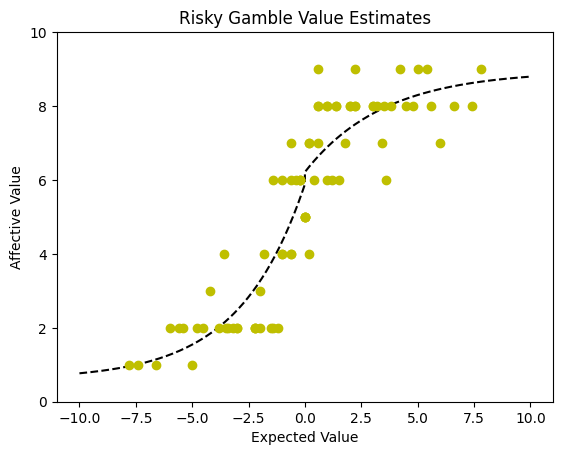

In [16]:
x, curve = curve_fit(expected_values, attitudes)
plot_curve(x,
    curve,
    expected_values,
    attitudes)

In [10]:
%autoreload 2

inputs = []
outputs = []
all_gvs = []
all_bvs = []
all_pws = []

for i in range(len(expected_values)):
  for j in range(len(attitude_samples[i])):
    inputs.append(expected_values[i])
    outputs.append(attitude_samples[i][j])
    all_gvs.append(gvs[i])
    all_bvs.append(bvs[i])
    all_pws.append(pws[i])

outcomes = curve_fit(inputs, outputs)
plot_curve(*outcomes, inputs, outputs, title = "LlaMA3: Risky gamble value estimates")

NameError: name 'attitude_samples' is not defined

In [18]:
import csv

vals = [[bv, gv, pw] for bv in bvs for gv in gvs for pw in pws]

with open('./llama3-70b-full-pos.csv', 'w') as f:

  writer = csv.writer(f)
  writer.writerow(
    ["EV", "BV", "GV", "PW", 
     "logits_1", "logits_2", "logits_3", "logits_4", "logits_5", 
     "logits_6", "logits_7", "logits_8", "logits_9", "logits_10"]
  )
  for i in range(len(attitudes)):
    p = list(all_logits[i].values())
    p = np.array(p) / sum(p)
    writer.writerow(
      [expected_values[i], vals[i][0], vals[i][1], vals[i][2], *p] 
    )

In [19]:
gvs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bvs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
pws = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
expected_values = []
attitudes = []
all_logits = []
query_tokens = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
for gv in gvs:
  for bv in bvs:
    for pw in pws:

      # Compute the expected value of the gamble.
      expected_value = pw * gv + (1 - pw) * -1*bv
      gamble_input = f"Probability of Winning (P_w): {pw}, Positive Value on Win (G): {gv}, Negative Value on Loss (B): {-bv}"
      # Compute affective LLM value estimate
      llm_value, logits = compute_desire_for_gamble(model, gamble_input, query_tokens=query_tokens, valence = "negative")

      for j in range(10):
        if str(j+1) not in logits.keys():
          logits[str(j+1)] = 0

      all_logits.append(logits)
      expected_values.append(expected_value)
      attitudes.append(llm_value)

In [20]:
import csv

vals = [[bv, gv, pw] for bv in bvs for gv in gvs for pw in pws]

with open('./llama3-70b-full-neg.csv', 'w') as f:

  writer = csv.writer(f)
  writer.writerow(
    ["EV", "BV", "GV", "PW", 
     "logits_1", "logits_2", "logits_3", "logits_4", "logits_5", 
     "logits_6", "logits_7", "logits_8", "logits_9", "logits_10"]
  )
  for i in range(len(attitudes)):
    p = list(all_logits[i].values())
    p = np.array(p) / sum(p)
    writer.writerow(
      [expected_values[i], vals[i][0], vals[i][1], vals[i][2], *p] 
    )